In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans
from imblearn.under_sampling import ClusterCentroids

AttributeError: type object 'numpy.ndarray' has no attribute '__array_function__'

In [2]:
df = pd.read_csv("data/creditcard.csv")

In [17]:
df_nofraud = df[df["Class"] == 0]
df_fraud = df[df["Class"] == 1]

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


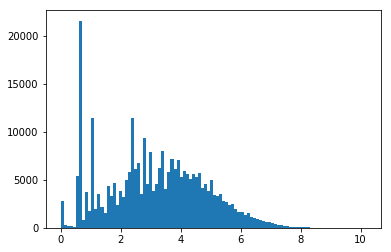

In [25]:
plt.hist(np.log(df["Amount"]+1), bins=100)
plt.show()

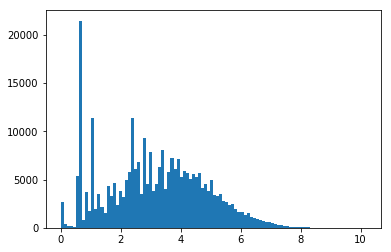

In [21]:
plt.hist(np.log(df_nofraud["Amount"]+1), bins=100)
plt.show()

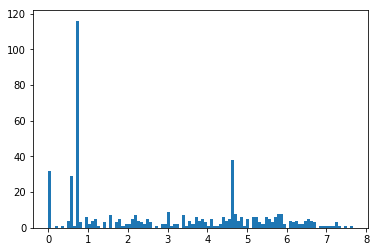

In [23]:
plt.hist(np.log(df_fraud["Amount"]+1), bins=100)
plt.show()

In [29]:
len(df[df["Amount"] < 2])

46990

In [30]:
len(df)

284807

### Model - under sampling

In [3]:
y = df["Class"]
X = df.drop("Class", 1).drop("Time", 1)

scaler = preprocessing.StandardScaler()
scaler.fit(X)

train, test = train_test_split(df, test_size=0.20, stratify=y)

In [4]:
train["Class"].value_counts()

0    227451
1       394
Name: Class, dtype: int64

In [5]:
x_train_0 = train[train["Class"] == 0].drop("Class", axis=1).drop("Time", axis=1)
x_train_1 = train[train["Class"] == 1].drop("Class", axis=1).drop("Time", axis=1)
x_train_0 = scaler.transform(x_train_0)
x_train_1 = scaler.transform(x_train_1)

In [ ]:
km = KMeans(n_clusters=1000, n_jobs=20, n_init=10, max_iter=100).fit(x_train_0)

In [ ]:
print('ok')

In [ ]:
print('ok')